Импорт библиотек

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.layers as layers



Модуль для ограничения потребления видеопамяти (4 гига)

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (28, 28)

Загрузка данных для обучения и тестирования

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [5]:
print('X_train: '  + str(x_train.shape))
print('Y_train: '  + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [6]:
model = tf.keras.models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
        
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='sigmoid')
])

Определение оптимизатора, метода расчета потерь и собираемых метрик

In [7]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               1

Обучение модели

In [8]:
result = model.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(x_test,y_test),
    shuffle=True,
    verbose=True)

Epoch 1/20
1875/1875 [==============================] - 15s 7ms/step - loss: 1.4933 - sparse_categorical_accuracy: 0.4753 - val_loss: 0.5073 - val_sparse_categorical_accuracy: 0.8643
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6168 - sparse_categorical_accuracy: 0.8131 - val_loss: 0.2940 - val_sparse_categorical_accuracy: 0.9136
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4489 - sparse_categorical_accuracy: 0.8693 - val_loss: 0.2343 - val_sparse_categorical_accuracy: 0.9282
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3785 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.2005 - val_sparse_categorical_accuracy: 0.9388
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.1843 - val_sparse_categorical_accuracy: 0.9450
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3020 -

Проверка точности

In [9]:
score = model.evaluate(x = x_train,y = y_train, verbose=1)
print('Точность на обучающай выборке: {}%'.format(score[1]*100))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0727 - sparse_categorical_accuracy: 0.9793
Точность на обучающай выборке: 97.92666435241699%


In [10]:
score = model.evaluate(x = x_test,y = y_test, verbose=1)
print('Точность на тестовой выборке: {}%'.format(score[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9673
Точность на тестовой выборке: 96.72999978065491%


Построение графиков

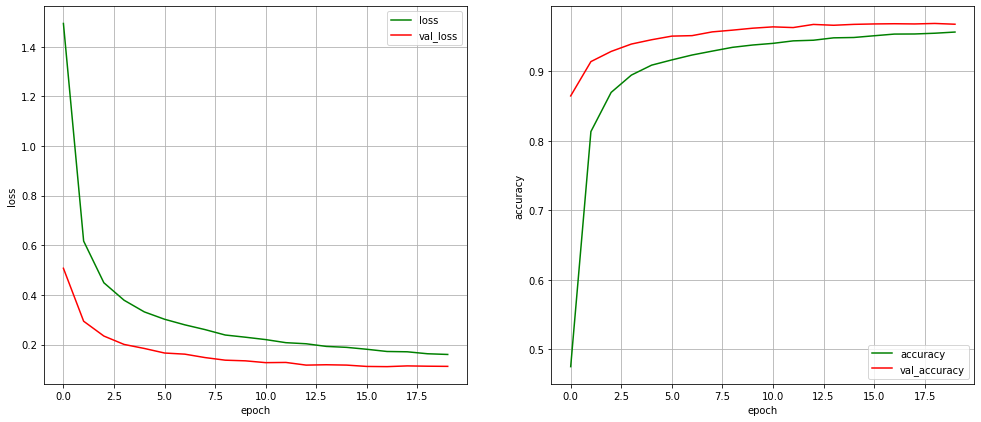

In [11]:
#Графики
px = 1/pyplot.rcParams['figure.dpi']
fig, (ax1,ax2) = pyplot.subplots(ncols=2, figsize=(1200*px,500*px))

ax1.plot(result.history['loss'], color='green')
ax1.plot(result.history['val_loss'], color='red')
ax1.legend(['loss','val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.grid(True)

ax2.plot(result.history['sparse_categorical_accuracy'], color='green')
ax2.plot(result.history['val_sparse_categorical_accuracy'], color='red')
ax2.legend(['accuracy','val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.grid(True)